In [48]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os
import glob

In [49]:
class Data_info:
    def __init__(self, name,nbins=10):
        Data_list=[]
        for file in glob.glob("%s*"%(name)):
            data_temp=pd.read_csv(file,sep=' ')
            Data_list.append(data_temp)
        self.data = pd.concat(Data_list).dropna(axis="columns")
        self.channels = ['ch0', 'ch1']
        self.nbins = nbins
    def get_channel_data(self, channel):
        return self.data[channel]
    def get_statistics(self, channel):
        if channel in self.channels:
            return self.data[channel].describe()
        else:
            raise ValueError(f"Channel {channel} not found.")
    def get_binnings(self, channel):
        if channel in self.channels:
            data = self.data[channel]
            hist, bin_edges = np.histogram(data, bins=self.nbins)
            bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
            return bin_centers, hist
        else:
            raise ValueError(f"Channel {channel} not found.")
    def get_peaks(self, channel):
        if channel in self.channels:
            data = self.data[channel]
            hist, bin_edges = np.histogram(data, bins=self.nbins)
            bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
            peaks, _ = sp.signal.find_peaks(hist, height=0)
            return bin_centers[peaks], hist[peaks]
        else:
            raise ValueError(f"Channel {channel} not found.")
    def fit_gaussian(self, channel,intervals):
        xmin,xmax=intervals
        gaussian = lambda x, amp_, mean_, std: amp_ * np.exp(-((x - mean_) ** 2) / (2 * std ** 2))
        if channel in self.channels:
            data = self.data[channel]
            data=data[(data >= xmin) & (data <= xmax)]
            hist, bin_edges = np.histogram(data, bins=self.nbins)
            bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
            mean = np.mean(data)
            std_dev = np.std(data)
            x=np.linspace(xmin, xmax, 1000)
            y= gaussian(x, hist.max(), mean,std_dev)
            print("mean=",mean)
            print("std_dev=",std_dev)
            print("max=",hist.max())
            return x,y,[mean, std_dev, hist.max()]
        else:
            raise ValueError(f"Channel {channel} not found.")

# Pedestal

mean= 113.45105616258995
std_dev= 0.807842642027893
max= 490100


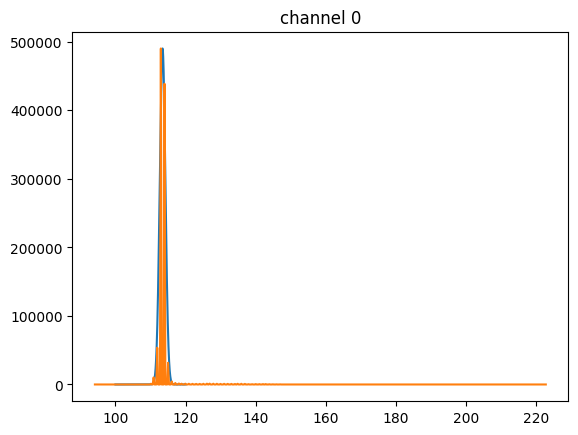

In [50]:
channel_consideration=['ch0', 'ch1']
# Example usage
Data = Data_info('datas/dataset_may5/pedestal_noCoincidence_2channel',nbins=500)
x_,y_,_=Data.fit_gaussian('ch0',[100,120])
plt.title("channel 0")
plt.plot(x_,y_)
plt.plot(Data.get_binnings('ch0')[0],Data.get_binnings('ch0')[1])

mean= 77.34388145497459
std_dev= 2.0377257613581854
max= 658421


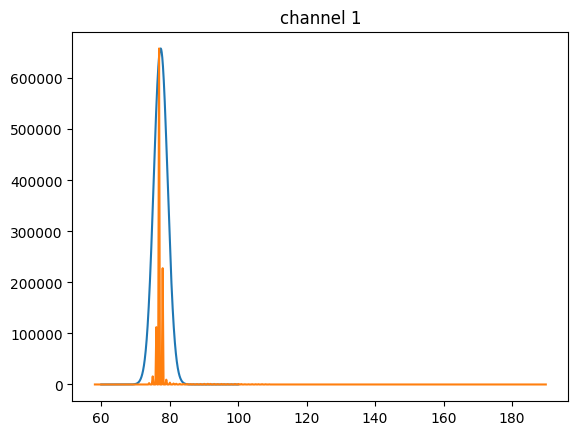

In [51]:
x_,y_,_=Data.fit_gaussian('ch1',[60,100])
plt.title("channel 1")
plt.plot(x_,y_)
plt.plot(Data.get_binnings('ch1')[0],Data.get_binnings('ch1')[1])

In [52]:
channel0_pedestal_filter=113.45105616258995+2*0.807842642027893
channel1_pedestal_filter=77.34388145497459+2*2.0377257613581854

# SiPM from single channel

## Channel 0

mean= 196.94477572089713
std_dev= 63.31783937936973
max= 698


/tmp/ipykernel_11382/2179988960.py:17: RuntimeWarning: divide by zero encountered in log10
  plt.plot(X,np.log10(Y),".-r",label='histogram')


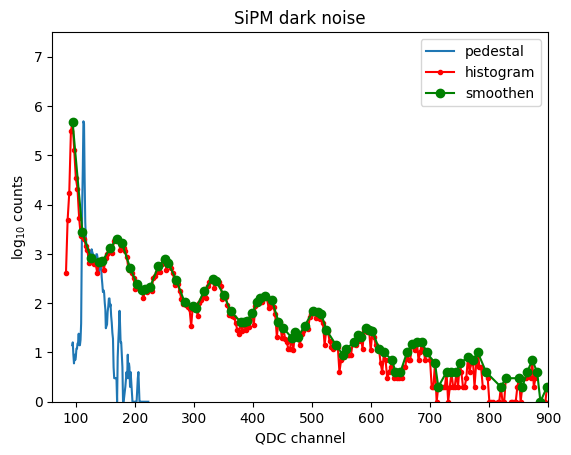

In [53]:
channel_consideration=['ch0', 'ch1']
# Example usage
Data = Data_info('datas/dataset_may5/sipm1_noCoincidence',nbins=500)
X,Y=Data.get_binnings('ch0')
x_fit,y_fit,_=Data.fit_gaussian('ch0',[channel0_pedestal_filter,400])
X_peak,y_peak=Data.get_peaks('ch0')
pedestal = Data_info('datas/dataset_may5/pedestal_noCoincidence_2channel',nbins=500)
x_pedestal,y_pedestal=pedestal.get_binnings('ch0')
x_pedestal_filter0=x_pedestal[y_pedestal!=0]
y_pedestal_filter0=y_pedestal[y_pedestal!=0]
plt.plot(x_pedestal_filter0,np.log10(y_pedestal_filter0),label='pedestal')
plt.xlim(60,900)
plt.ylim(0,7.5)
plt.title("SiPM dark noise")
plt.xlabel("QDC channel")
plt.ylabel(r"log$_{10}$ counts")
plt.plot(X,np.log10(Y),".-r",label='histogram')
plt.plot(X_peak,np.log10(y_peak),"-og",label='smoothen')
plt.legend()

## Channel 1

mean= 169.5125138744674
std_dev= 71.4788317157669
max= 517


/tmp/ipykernel_11382/554601901.py:10: RuntimeWarning: divide by zero encountered in log
  plt.plot(X,np.log(Y),".-r",label='histogram')


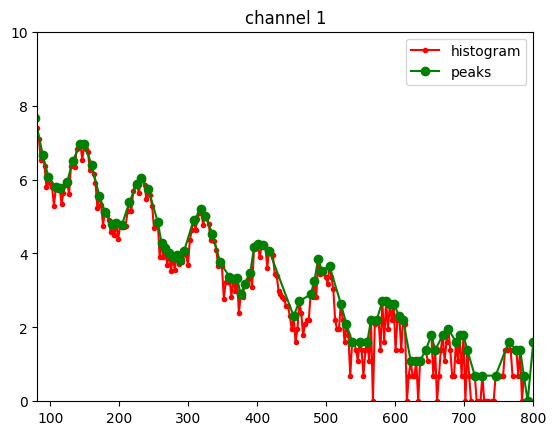

In [54]:
channel_consideration=['ch0', 'ch1']
# Example usage
Data = Data_info('datas/dataset_may5/sipm2_noCoincidence',nbins=500)
X,Y=Data.get_binnings('ch1')
x_fit,y_fit,_=Data.fit_gaussian('ch1',[channel1_pedestal_filter,400])
X_peak,y_peak=Data.get_peaks('ch1')
plt.xlim(channel1_pedestal_filter,800)
plt.ylim(0,10)
plt.title("channel 1")
plt.plot(X,np.log(Y),".-r",label='histogram')
plt.plot(X_peak,np.log(y_peak),"-og",label='peaks')
plt.legend()

# SiPM from coincidence

## Channel 0

mean= 169.24390099828696
std_dev= 57.89104408438279
max= 1206


/tmp/ipykernel_11382/2390744842.py:9: RuntimeWarning: divide by zero encountered in log
  plt.plot(X,np.log(Y),".-r",label='histogram')


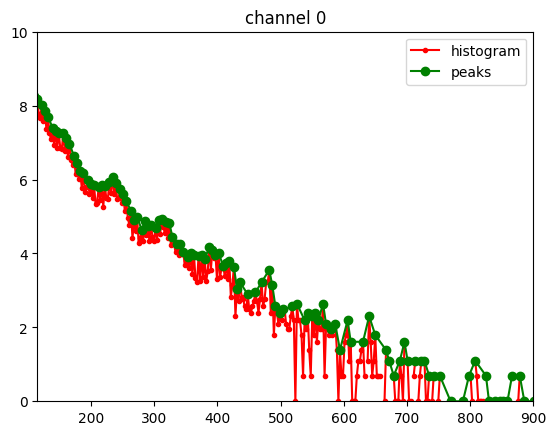

In [55]:
# Example usage
Data = Data_info('datas/dataset_may5/sipm1sipm2_Coincidence',nbins=500)
X,Y=Data.get_binnings('ch0')
x_fit,y_fit,_=Data.fit_gaussian('ch0',[channel0_pedestal_filter,400])
X_peak,y_peak=Data.get_peaks('ch0')
plt.xlim(channel0_pedestal_filter,900)
plt.ylim(0,10)
plt.title("channel 0")
plt.plot(X,np.log(Y),".-r",label='histogram')
plt.plot(X_peak,np.log(y_peak),"-og",label='peaks')
plt.legend()

mean= 189.2221280203476
std_dev= 67.54403045740416
max= 1347


/tmp/ipykernel_11382/3057608634.py:9: RuntimeWarning: divide by zero encountered in log
  plt.plot(X,np.log(Y),".-r",label='histogram')


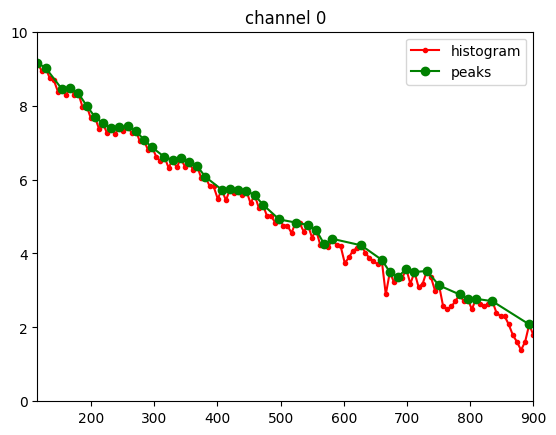

In [56]:
# Example usage
Data = Data_info('datas/dataset_may5/sipm1sipm2_extended',nbins=500)
X,Y=Data.get_binnings('ch0')
x_fit,y_fit,_=Data.fit_gaussian('ch0',[channel0_pedestal_filter,400])
X_peak,y_peak=Data.get_peaks('ch0')
plt.xlim(channel0_pedestal_filter,900)
plt.ylim(0,10)
plt.title("channel 0")
plt.plot(X,np.log(Y),".-r",label='histogram')
plt.plot(X_peak,np.log(y_peak),"-og",label='peaks')
plt.legend()

## Channel 1

mean= 159.61991046685142
std_dev= 68.98316692024424
max= 230


/tmp/ipykernel_11382/3093955272.py:9: RuntimeWarning: divide by zero encountered in log
  plt.plot(X,np.log(Y),".-r",label='histogram')


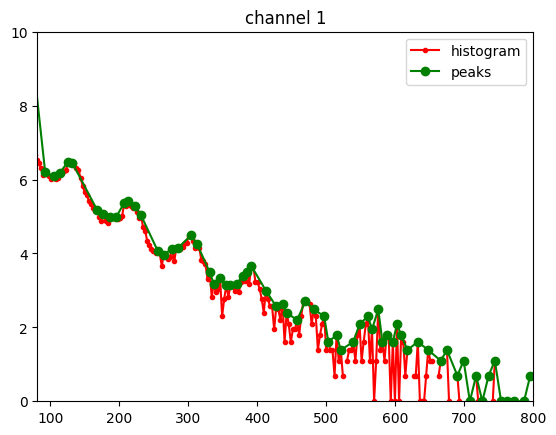

In [57]:
# Example usage
Data = Data_info('datas/dataset_may5/sipm1sipm2_Coincidence',nbins=500)
X,Y=Data.get_binnings('ch1')
x_fit,y_fit,_=Data.fit_gaussian('ch1',[channel1_pedestal_filter,400])
X_peak,y_peak=Data.get_peaks('ch1')
plt.xlim(channel1_pedestal_filter,800)
plt.ylim(0,10)
plt.title("channel 1")
plt.plot(X,np.log(Y),".-r",label='histogram')
plt.plot(X_peak,np.log(y_peak),"-og",label='peaks')
plt.legend()

mean= 164.82922563205597
std_dev= 72.6066085408544
max= 317


/tmp/ipykernel_11382/3087202527.py:9: RuntimeWarning: divide by zero encountered in log
  plt.plot(X,np.log(Y),".-r",label='histogram')


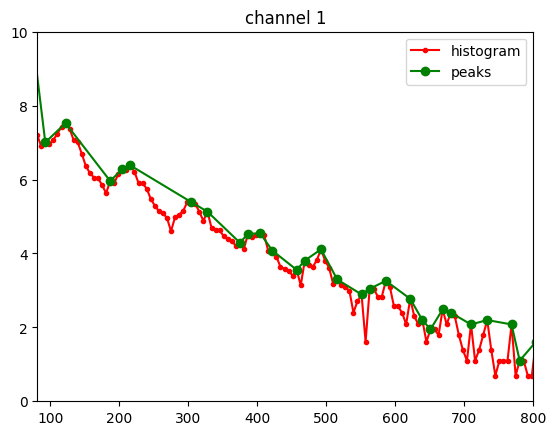

In [58]:
# Example usage
Data = Data_info('datas/dataset_may5/sipm1sipm2_extended',nbins=500)
X,Y=Data.get_binnings('ch1')
x_fit,y_fit,_=Data.fit_gaussian('ch1',[channel1_pedestal_filter,400])
X_peak,y_peak=Data.get_peaks('ch1')
plt.xlim(channel1_pedestal_filter,800)
plt.ylim(0,10)
plt.title("channel 1")
plt.plot(X,np.log(Y),".-r",label='histogram')
plt.plot(X_peak,np.log(y_peak),"-og",label='peaks')
plt.legend()

# SiPM from no coincidence

## Channel 0

mean= 193.81871432302356
std_dev= 64.32389630530065
max= 471


/tmp/ipykernel_11382/1356497180.py:10: RuntimeWarning: divide by zero encountered in log
  plt.plot(X,np.log(Y),".-r",label='histogram')


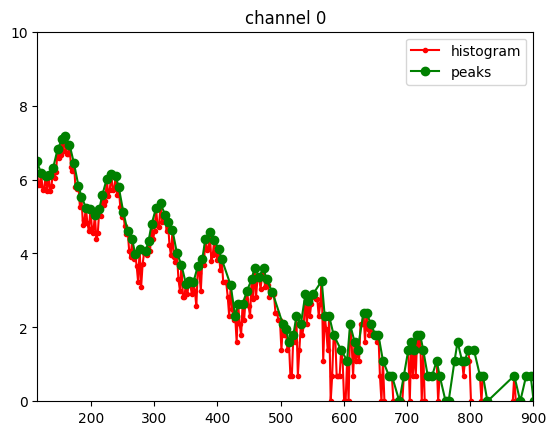

In [59]:
channel_consideration=['ch0', 'ch1']
# Example usage
Data = Data_info('datas/dataset_may5/sipm1sipm2_OR_No',nbins=500)
X,Y=Data.get_binnings('ch0')
x_fit,y_fit,_=Data.fit_gaussian('ch0',[channel0_pedestal_filter,400])
X_peak,y_peak=Data.get_peaks('ch0')
plt.xlim(channel0_pedestal_filter,900)
plt.ylim(0,10)
plt.title("channel 0")
plt.plot(X,np.log(Y),".-r",label='histogram')
plt.plot(X_peak,np.log(y_peak),"-og",label='peaks')
plt.legend()

mean= 194.92741184986042
std_dev= 63.585465884365725
max= 426


/tmp/ipykernel_11382/4287557691.py:10: RuntimeWarning: divide by zero encountered in log
  plt.plot(X,np.log(Y),".-r",label='histogram')


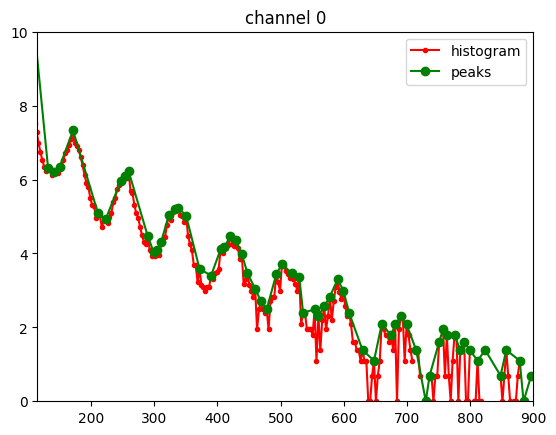

In [60]:
channel_consideration=['ch0', 'ch1']
# Example usage
Data = Data_info('datas/dataset_may5/sipm1sipm2_noCoinci',nbins=500)
X,Y=Data.get_binnings('ch0')
x_fit,y_fit,_=Data.fit_gaussian('ch0',[channel0_pedestal_filter,400])
X_peak,y_peak=Data.get_peaks('ch0')
plt.xlim(channel0_pedestal_filter,900)
plt.ylim(0,10)
plt.title("channel 0")
plt.plot(X,np.log(Y),".-r",label='histogram')
plt.plot(X_peak,np.log(y_peak),"-og",label='peaks')
plt.legend()

## Channel 1

mean= 172.92170455703945
std_dev= 74.04316471156267
max= 157


/tmp/ipykernel_11382/685356971.py:10: RuntimeWarning: divide by zero encountered in log
  plt.plot(X,np.log(Y),".-r",label='histogram')


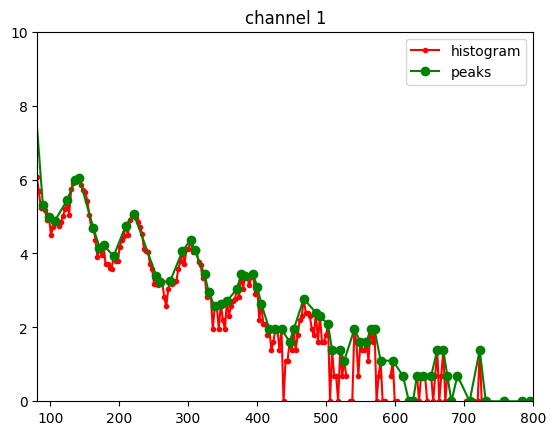

In [61]:
channel_consideration=['ch0', 'ch1']
# Example usage
Data = Data_info('datas/dataset_may5/sipm1sipm2_OR_No',nbins=500)
X,Y=Data.get_binnings('ch1')
x_fit,y_fit,_=Data.fit_gaussian('ch1',[channel1_pedestal_filter,400])
X_peak,y_peak=Data.get_peaks('ch1')
plt.xlim(channel1_pedestal_filter,800)
plt.ylim(0,10)
plt.title("channel 1")
plt.plot(X,np.log(Y),".-r",label='histogram')
plt.plot(X_peak,np.log(y_peak),"-og",label='peaks')
plt.legend()

mean= 170.3557720990355
std_dev= 71.7223990143722
max= 151


/tmp/ipykernel_11382/40855055.py:10: RuntimeWarning: divide by zero encountered in log
  plt.plot(X,np.log(Y),".-r",label='histogram')


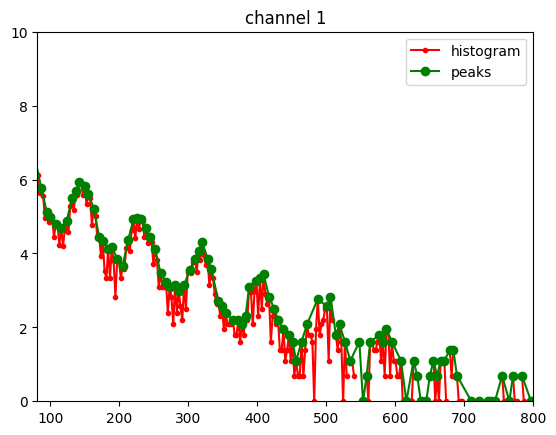

In [62]:
channel_consideration=['ch0', 'ch1']
# Example usage
Data = Data_info('datas/dataset_may5/sipm1sipm2_noCoinci',nbins=500)
X,Y=Data.get_binnings('ch1')
x_fit,y_fit,_=Data.fit_gaussian('ch1',[channel1_pedestal_filter,400])
X_peak,y_peak=Data.get_peaks('ch1')
plt.xlim(channel1_pedestal_filter,800)
plt.ylim(0,10)
plt.title("channel 1")
plt.plot(X,np.log(Y),".-r",label='histogram')
plt.plot(X_peak,np.log(y_peak),"-og",label='peaks')
plt.legend()

# Template

/tmp/ipykernel_11382/4000026458.py:6: RuntimeWarning: divide by zero encountered in log10
  Y=np.log10(Y)
/home/eltisau/software/miniconda3/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:1286: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
/home/eltisau/software/miniconda3/lib/python3.13/site-packages/scipy/integrate/_quadrature.py:532: RuntimeWarning: invalid value encountered in scalar subtract
  result += alpha*y[slice1] + beta*y[slice2] - eta*y[slice3]
/home/eltisau/software/miniconda3/lib/python3.13/site-packages/scipy/integrate/_quadrature.py:328: RuntimeWarning: invalid value encountered in add
  res = np.cumsum(d * (y[slice1] + y[slice2]) / 2.0, axis=axis)
/home/eltisau/software/miniconda3/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


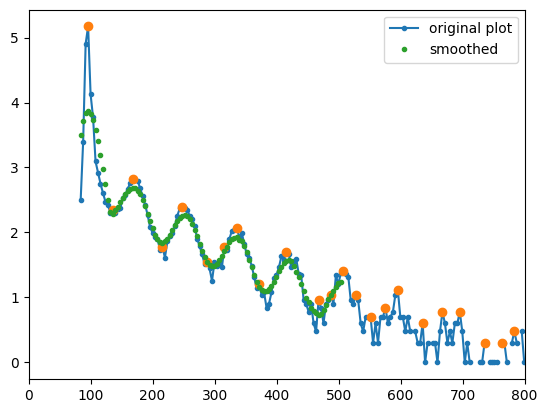

In [ ]:
datas=pd.read_csv("datas/dataset_may5/sipm1_noCoincidence.txt",sep=' ')["ch0"]
Y,X=np.histogram(datas, bins=300)


X=(X[1:]+X[:-1])/2
Y=np.log10(Y)
smoothed_hist = sp.signal.savgol_filter(Y, window_length=21, polyorder=3)
dydx=np.gradient(Y)
intY=sp.integrate.simpson(Y,x=X) # integrate all
y_int = sp.integrate.cumulative_trapezoid(Y, X, initial=0)
dydx_int = sp.integrate.cumulative_trapezoid(dydx, X, initial=0)
plt.plot(X,Y,".-",label="original plot")

peaks,_=sp.signal.find_peaks(Y,height=0,distance=5)
plt.plot(X[peaks],Y[peaks],"o")
plt.plot(X,smoothed_hist,".",label="smoothed")

plt.xlim(0,800)
#plt.ylim(-150,150)
plt.legend()

In [ ]:
Y[peaks]

array([5.16978608, 2.34044411, 2.81690384, 1.77815125, 2.39269695,
       1.54406804, 1.77815125, 2.06445799, 1.20411998, 1.69897   ,
       0.95424251, 1.04139269, 1.41497335, 1.04139269, 0.69897   ,
       0.84509804, 1.11394335, 0.60205999, 0.77815125, 0.77815125,
       0.30103   , 0.30103   , 0.47712125, 0.        , 0.47712125,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp_signal
import scipy.integrate as sp_integrate

def classify_photoelectric_peaks(X, Y, prominence=0.05, distance=3, plot=True):
    """
    Classify photoelectric peaks in SiPM QDC histogram data.
    
    Parameters:
    - X: Bin centers of the histogram
    - Y: Log10-transformed histogram counts
    - prominence: Minimum prominence for peak detection (relative to max Y)
    - distance: Minimum distance between peaks (in bins)
    - plot: Whether to plot the histogram and peaks
    
    Returns:
    - peak_positions: QDC values of detected peaks
    - peak_labels: Photoelectron labels (1 p.e., 2 p.e., etc.)
    """
    # Smooth the histogram
    smoothed_hist = sp_signal.savgol_filter(Y, window_length=21, polyorder=3)
    
    # Find peaks in the smoothed histogram
    peaks, properties = sp_signal.find_peaks(smoothed_hist, height=0, distance=distance, prominence=prominence * np.max(smoothed_hist))
    peak_positions = X[peaks]
    
    # Sort peaks by QDC value
    peak_positions = np.sort(peak_positions)
    
    # Debugging: Print detected peak positions
    print("Detected peak positions (QDC values):", [f"{pos:.1f}" for pos in peak_positions])
    
    # Estimate gain (average distance between consecutive peaks)
    if len(peak_positions) > 1:
        differences = np.diff(peak_positions)
        # Use only the first few differences for gain estimation to avoid later inconsistencies
        gain = np.median(differences[:min(5, len(differences))])
        print(f"Estimated gain (QDC per p.e.): {gain:.1f}")
    else:
        gain = None
        print("Warning: Fewer than 2 peaks detected. Cannot estimate gain.")
    
    # Label peaks as 1 p.e., 2 p.e., etc.
    peak_labels = []
    if gain is not None:
        # Assume the leftmost peak is 1 p.e.
        first_peak = peak_positions[0]
        for pos in peak_positions:
            # Allow some tolerance in peak position (±20% of gain)
            pe_number = round((pos - first_peak) / gain) + 1
            if abs((pos - first_peak) - (pe_number - 1) * gain) > 0.2 * gain:
                print(f"Warning: Peak at QDC {pos:.1f} may be misclassified (expected ~{first_peak + (pe_number - 1) * gain:.1f})")
            peak_labels.append(pe_number)
    else:
        peak_labels = [1] if len(peak_positions) > 0 else []
    
    # Verify peak spacing consistency
    if len(peak_positions) > 1:
        spacing_deviation = np.std(differences) / gain
        print(f"Peak spacing deviation (std/gain): {spacing_deviation:.3f}")
        if spacing_deviation > 0.2:
            print("Warning: Inconsistent peak spacing detected. Higher p.e. peaks may be noisy.")
    
    # Plotting
    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(X, Y, ".-", label="Log10 Histogram")
        plt.plot(X, smoothed_hist, "-", label="Smoothed Histogram")
        plt.plot(X[peaks], smoothed_hist[peaks], "o", label="Detected Peaks")
        for pos, label in zip(peak_positions, peak_labels):
            plt.axvline(pos, color='blue', linestyle='--', alpha=0.7)
            plt.text(pos, np.max(Y) * 0.9, f'{label} p.e.', rotation=90, verticalalignment='top')
        plt.xlim(0, 800)
        plt.xlabel('QDC Value')
        plt.ylabel('Log10(Counts)')
        plt.title('SiPM Photoelectric Peaks')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.savefig('sipm_peaks_classified.png')
        plt.close()
    
    return peak_positions, peak_labels

# Load and process data
datas = pd.read_csv("datas/dataset_may5/sipm1_noCoincidence.txt", sep=' ')["ch0"]
Y, X = np.histogram(datas, bins=300)
X = (X[1:] + X[:-1]) / 2
Y = np.log10(Y + 1)  # Add 1 to avoid log(0)

# Compute additional metrics (preserving original calculations)
dydx = np.gradient(Y, X)
intY = sp_integrate.simpson(Y, x=X)
y_int = sp_integrate.cumulative_trapezoid(Y, X, initial=0)
dydx_int = sp_integrate.cumulative_trapezoid(dydx, X, initial=0)

# Classify peaks
peak_positions, peak_labels = classify_photoelectric_peaks(X, Y, prominence=0.05, distance=3)

# Print results
print("\nDetected Peaks:")
for pos, label in zip(peak_positions, peak_labels):
    print(f"Peak at QDC {pos:.1f}: {label} p.e.")

Detected peak positions (QDC values): ['96.0', '167.9', '251.9', '335.8', '419.7', '507.6', '587.6', '679.5', '779.4', '855.4']
Estimated gain (QDC per p.e.): 83.9
Peak spacing deviation (std/gain): 0.094

Detected Peaks:
Peak at QDC 96.0: 1 p.e.
Peak at QDC 167.9: 2 p.e.
Peak at QDC 251.9: 3 p.e.
Peak at QDC 335.8: 4 p.e.
Peak at QDC 419.7: 5 p.e.
Peak at QDC 507.6: 6 p.e.
Peak at QDC 587.6: 7 p.e.
Peak at QDC 679.5: 8 p.e.
Peak at QDC 779.4: 9 p.e.
Peak at QDC 855.4: 10 p.e.


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp_signal
import scipy.integrate as sp_integrate
from scipy.optimize import curve_fit

def gaussian(x, amplitude, mean, sigma):
    """Gaussian function for fitting."""
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

def classify_photoelectric_peaks(X, Y, raw_counts, raw_data, prominence=0.05, distance=3, sigma_factor=1.5, plot=True):
    """
    Classify photoelectric peaks, define boundaries, and count events in SiPM QDC histogram data.
    
    Parameters:
    - X: Bin centers of the histogram
    - Y: Log10-transformed histogram counts
    - raw_counts: Raw histogram counts (before log10)
    - raw_data: Original QDC data points
    - prominence: Minimum prominence for peak detection
    - distance: Minimum distance between peaks (in bins)
    - sigma_factor: Number of sigmas for boundary width (e.g., 1.5 for ±1.5σ)
    - plot: Whether to plot the histogram, peaks, and boundaries
    
    Returns:
    - peak_positions: QDC values of detected peaks
    - peak_labels: Photoelectron labels (1 p.e., 2 p.e., etc.)
    - boundaries: List of [lower, upper] QDC boundaries for each p.e.
    - gaussian_params: List of [amplitude, mean, sigma] for each peak
    - pe_counts: Number of events in each p.e. interval
    """
    # Smooth the histogram
    smoothed_hist = sp_signal.savgol_filter(Y, window_length=21, polyorder=3)
    
    # Find peaks in the smoothed histogram
    peaks, properties = sp_signal.find_peaks(smoothed_hist, height=0, distance=distance, prominence=prominence * np.max(smoothed_hist))
    peak_positions = X[peaks]
    
    # Sort peaks by QDC value
    peak_positions = np.sort(peak_positions)
    
    # Debugging: Print detected peak positions
    print("Detected peak positions (QDC values):", [f"{pos:.1f}" for pos in peak_positions])
    
    # Fit Gaussians to each peak using raw counts
    gaussian_params = []
    window = 20  # QDC units around peak for fitting
    for peak_pos in peak_positions:
        # Select data around the peak
        mask = (X >= peak_pos - window) & (X <= peak_pos + window)
        x_fit = X[mask]
        y_fit = raw_counts[mask]
        
        # Initial guess: amplitude = max counts, mean = peak position, sigma = gain/10
        initial_guess = [np.max(y_fit), peak_pos, 10.0]
        try:
            popt, _ = curve_fit(gaussian, x_fit, y_fit, p0=initial_guess, bounds=(0, np.inf))
            gaussian_params.append(popt)  # [amplitude, mean, sigma]
        except RuntimeError:
            print(f"Warning: Gaussian fit failed for peak at QDC {peak_pos:.1f}. Using default sigma.")
            gaussian_params.append([np.max(y_fit), peak_pos, 10.0])
    
    # Estimate gain (median distance between first few peaks)
    if len(peak_positions) > 1:
        differences = np.diff([p[1] for p in gaussian_params])  # Use fitted means
        gain = np.median(differences[:min(5, len(differences))])
        print(f"Estimated gain (QDC per p.e.): {gain:.1f}")
    else:
        gain = None
        print("Warning: Fewer than 2 peaks detected. Cannot estimate gain.")
    
    # Label peaks and define boundaries
    peak_labels = []
    boundaries = []
    pe_counts = []
    if gain is not None:
        first_mean = gaussian_params[0][1]
        for i, (amp, mean, sigma) in enumerate(gaussian_params):
            # Label peak
            pe_number = round((mean - first_mean) / gain) + 1
            peak_labels.append(pe_number)
            
            # Define boundaries: mean ± sigma_factor * sigma
            lower_bound = mean - sigma_factor * sigma
            upper_bound = mean + sigma_factor * sigma
            boundaries.append([lower_bound, upper_bound])
            
            # Count events in this boundary
            count = np.sum((raw_data >= lower_bound) & (raw_data <= upper_bound))
            pe_counts.append(count)
        
        # Adjust boundaries to avoid overlap
        for i in range(len(boundaries) - 1):
            if boundaries[i][1] > boundaries[i + 1][0]:
                mid_point = (gaussian_params[i][1] + gaussian_params[i + 1][1]) / 2
                boundaries[i][1] = mid_point
                boundaries[i + 1][0] = mid_point
    else:
        peak_labels = [1] if len(peak_positions) > 0 else []
        boundaries = [[peak_positions[0] - 10, peak_positions[0] + 10]] if len(peak_positions) > 0 else []
        pe_counts = [np.sum((raw_data >= boundaries[0][0]) & (raw_data <= boundaries[0][1]))] if boundaries else []
    
    # Verify peak spacing consistency
    if len(peak_positions) > 1:
        spacing_deviation = np.std(differences) / gain if gain else 0
        print(f"Peak spacing deviation (std/gain): {spacing_deviation:.3f}")
        if spacing_deviation > 0.2:
            print("Warning: Inconsistent peak spacing detected. Higher p.e. peaks may be noisy.")
    
    # Plotting
    if plot:
        plt.figure(figsize=(12, 6))
        plt.bar(X, raw_counts, width=(X[1] - X[0]), alpha=0.5, label="Raw Histogram", color='gray')
        for i, (amp, mean, sigma) in enumerate(gaussian_params):
            x_fit = np.linspace(mean - 3 * sigma, mean + 3 * sigma, 100)
            plt.plot(x_fit, gaussian(x_fit, amp, mean, sigma), 'b-', alpha=0.7, label="Gaussian Fits" if i == 0 else None)
            plt.axvline(mean, color='blue', linestyle='--', alpha=0.7)
            plt.axvspan(boundaries[i][0], boundaries[i][1], alpha=0.2, color='green', label="Boundaries" if i == 0 else None)
            # Add p.e. label above the peak
            plt.text(mean, gaussian(mean, amp, mean, sigma) * 1.5, f'{peak_labels[i]} p.e.', 
                     horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')
        # Add legend entries for p.e. counts
        for i, (label, count) in enumerate(zip(peak_labels, pe_counts)):
            plt.plot([], [], ' ', label=f"{label} p.e.: {count} events")
        plt.xlim(0, 800)
        plt.yscale('log')
        plt.ylim(1, np.max(raw_counts) * 2)  # Ensure visibility of low counts
        plt.xlabel('QDC Value')
        plt.ylabel('Counts (Log Scale)')
        plt.title('SiPM Photoelectric Peaks with Gaussian Fits and Boundaries')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('sipm_peaks_with_boundaries_logscale_labeled.png')
        plt.close()
    
    return peak_positions, peak_labels, boundaries, gaussian_params, pe_counts

# Load and process data
datas = pd.read_csv("datas/dataset_may5/sipm1_noCoincidence.txt", sep=' ')["ch0"]
raw_counts, X = np.histogram(datas, bins=300)
X = (X[1:] + X[:-1]) / 2
Y = np.log10(raw_counts + 1)  # Add 1 to avoid log(0)

# Compute additional metrics (preserving original calculations)
dydx = np.gradient(Y, X)
intY = sp_integrate.simpson(Y, x=X)
y_int = sp_integrate.cumulative_trapezoid(Y, X, initial=0)
dydx_int = sp_integrate.cumulative_trapezoid(dydx, X, initial=0)

# Classify peaks and define boundaries
peak_positions, peak_labels, boundaries, gaussian_params, pe_counts = classify_photoelectric_peaks(X, Y, raw_counts, datas, prominence=0.05, distance=3, sigma_factor=1.5)

# Print results
print("\nDetected Peaks and Boundaries:")
for pos, label, boundary, params, count in zip(peak_positions, peak_labels, boundaries, gaussian_params, pe_counts):
    print(f"Peak at QDC {params[1]:.1f} (σ={params[2]:.1f}): {label} p.e., Boundary [{boundary[0]:.1f}, {boundary[1]:.1f}], Events: {count}")

Detected peak positions (QDC values): ['96.0', '167.9', '251.9', '335.8', '419.7', '507.6', '587.6', '679.5', '779.4', '855.4']
Estimated gain (QDC per p.e.): 83.5
Peak spacing deviation (std/gain): 0.181

Detected Peaks and Boundaries:
Peak at QDC 94.8 (σ=2.3): 1 p.e., Boundary [91.3, 98.3], Events: 218121
Peak at QDC 169.5 (σ=14.2): 2 p.e., Boundary [148.2, 190.8], Events: 4922
Peak at QDC 250.7 (σ=13.9): 3 p.e., Boundary [229.8, 271.5], Events: 1860
Peak at QDC 334.2 (σ=14.4): 4 p.e., Boundary [312.5, 355.8], Events: 856
Peak at QDC 417.9 (σ=17.3): 5 p.e., Boundary [391.9, 443.9], Events: 404
Peak at QDC 506.5 (σ=12.8): 6 p.e., Boundary [487.2, 525.7], Events: 164
Peak at QDC 590.0 (σ=16.0): 7 p.e., Boundary [566.1, 614.0], Events: 73
Peak at QDC 715.1 (σ=58.1): 8 p.e., Boundary [628.0, 750.5], Events: 81
Peak at QDC 785.9 (σ=21.3): 9 p.e., Boundary [750.5, 817.8], Events: 17
Peak at QDC 860.0 (σ=13.3): 10 p.e., Boundary [839.9, 880.0], Events: 15


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp_signal
import scipy.integrate as sp_integrate
from scipy.optimize import curve_fit

def gaussian(x, amplitude, mean, sigma):
    """Gaussian function for fitting."""
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

def classify_photoelectric_peaks(X, Y, raw_counts, raw_data, prominence=0.05, distance=3, sigma_factor=1.5, plot=True):
    """
    Classify photoelectric peaks, define consistent boundaries, and count events in SiPM QDC histogram data.
    
    Parameters:
    - X: Bin centers of the histogram
    - Y: Log10-transformed histogram counts
    - raw_counts: Raw histogram counts (before log10)
    - raw_data: Original QDC data points
    - prominence: Minimum prominence for peak detection
    - distance: Minimum distance between peaks (in bins)
    - sigma_factor: Number of sigmas for boundary width (e.g., 1.5 for ±1.5σ)
    - plot: Whether to plot the histogram, peaks, and boundaries
    
    Returns:
    - peak_positions: QDC values of detected peaks
    - peak_labels: Photoelectron labels (1 p.e., 2 p.e., etc.)
    - boundaries: List of [lower, upper] QDC boundaries for each p.e.
    - gaussian_params: List of [amplitude, mean, sigma] for each peak
    - pe_counts: Number of events in each p.e. interval
    """
    # Smooth the histogram
    smoothed_hist = sp_signal.savgol_filter(Y, window_length=21, polyorder=3)
    
    # Find peaks in the smoothed histogram
    peaks, properties = sp_signal.find_peaks(smoothed_hist, height=0, distance=distance, prominence=prominence * np.max(smoothed_hist))
    peak_positions = X[peaks]
    
    # Sort peaks by QDC value
    peak_positions = np.sort(peak_positions)
    
    # Debugging: Print detected peak positions
    print("Detected peak positions (QDC values):", [f"{pos:.1f}" for pos in peak_positions])
    
    # Fit Gaussians to each peak using raw counts
    gaussian_params = []
    window = 30  # Increased QDC units around peak for fitting
    for peak_pos in peak_positions:
        # Select data around the peak
        mask = (X >= peak_pos - window) & (X <= peak_pos + window)
        x_fit = X[mask]
        y_fit = raw_counts[mask]
        
        # Initial guess: amplitude = max counts, mean = peak position, sigma = 5.0
        initial_guess = [np.max(y_fit), peak_pos, 5.0]
        try:
            popt, _ = curve_fit(gaussian, x_fit, y_fit, p0=initial_guess, bounds=(0, np.inf))
            gaussian_params.append(popt)  # [amplitude, mean, sigma]
        except RuntimeError:
            print(f"Warning: Gaussian fit failed for peak at QDC {peak_pos:.1f}. Using default sigma.")
            gaussian_params.append([np.max(y_fit), peak_pos, 5.0])
    
    # Estimate gain (median distance between first few peaks)
    if len(peak_positions) > 1:
        differences = np.diff([p[1] for p in gaussian_params])  # Use fitted means
        gain = np.median(differences[:min(5, len(differences))])
        print(f"Estimated gain (QDC per p.e.): {gain:.1f}")
    else:
        gain = None
        print("Warning: Fewer than 2 peaks detected. Cannot estimate gain.")
    
    # Calculate median sigma for consistent boundaries
    if gaussian_params:
        sigmas = [p[2] for p in gaussian_params]
        median_sigma = np.median(sigmas)
        print(f"Median sigma for boundaries: {median_sigma:.1f}")
        print(f"Fitted sigmas: {[f'{s:.1f}' for s in sigmas]}")
    else:
        median_sigma = 5.0
    
    # Label peaks and define boundaries
    peak_labels = []
    boundaries = []
    pe_counts = []
    if gain is not None:
        first_mean = gaussian_params[0][1]
        for i, (amp, mean, _) in enumerate(gaussian_params):
            # Label peak
            pe_number = round((mean - first_mean) / gain) + 1
            peak_labels.append(pe_number)
            
            # Define boundaries: mean ± sigma_factor * median_sigma
            lower_bound = mean - sigma_factor * median_sigma
            upper_bound = mean + sigma_factor * median_sigma
            boundaries.append([lower_bound, upper_bound])
            
            # Count events in this boundary
            count = np.sum((raw_data >= lower_bound) & (raw_data <= upper_bound))
            pe_counts.append(count)
        
        # Adjust boundaries to avoid overlap
        for i in range(len(boundaries) - 1):
            if boundaries[i][1] > boundaries[i + 1][0]:
                mid_point = (gaussian_params[i][1] + gaussian_params[i + 1][1]) / 2
                boundaries[i][1] = mid_point
                boundaries[i + 1][0] = mid_point
    else:
        peak_labels = [1] if len(peak_positions) > 0 else []
        boundaries = [[peak_positions[0] - 5, peak_positions[0] + 5]] if len(peak_positions) > 0 else []
        pe_counts = [np.sum((raw_data >= boundaries[0][0]) & (raw_data <= boundaries[0][1]))] if boundaries else []
    
    # Verify peak spacing consistency
    if len(peak_positions) > 1:
        spacing_deviation = np.std(differences) / gain if gain else 0
        print(f"Peak spacing deviation (std/gain): {spacing_deviation:.3f}")
        if spacing_deviation > 0.2:
            print("Warning: Inconsistent peak spacing detected. Higher p.e. peaks may be noisy.")
    
    # Print boundary widths for verification
    boundary_widths = [b[1] - b[0] for b in boundaries]
    print(f"Boundary widths: {[f'{w:.1f}' for w in boundary_widths]}")
    
    # Plotting
    if plot:
        plt.figure(figsize=(12, 6))
        plt.bar(X, raw_counts, width=(X[1] - X[0]), alpha=0.5, label="Raw Histogram", color='gray')
        for i, (amp, mean, sigma) in enumerate(gaussian_params):
            x_fit = np.linspace(mean - 3 * sigma, mean + 3 * sigma, 100)
            plt.plot(x_fit, gaussian(x_fit, amp, mean, sigma), 'b-', alpha=0.7, label="Gaussian Fits" if i == 0 else None)
            plt.axvline(mean, color='blue', linestyle='--', alpha=0.7)
            plt.axvspan(boundaries[i][0], boundaries[i][1], alpha=0.2, color='green', label="Boundaries" if i == 0 else None)
            # Add p.e. label above the peak
            plt.text(mean, gaussian(mean, amp, mean, sigma) * 1.5, f'{peak_labels[i]} p.e.', 
                     horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')
        # Add legend entries for p.e. counts
        for i, (label, count) in enumerate(zip(peak_labels, pe_counts)):
            plt.plot([], [], ' ', label=f"{label} p.e.: {count} events")
        plt.xlim(0, 800)
        plt.yscale('log')
        plt.ylim(1, np.max(raw_counts) * 2)  # Ensure visibility of low counts
        plt.xlabel('QDC Value')
        plt.ylabel('Counts (Log Scale)')
        plt.title('SiPM Photoelectric Peaks with Gaussian Fits and Consistent Boundaries')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('sipm_peaks_with_consistent_boundaries_logscale_labeled.png')
        plt.close()
    
    return peak_positions, peak_labels, boundaries, gaussian_params, pe_counts

# Load and process data
datas = pd.read_csv("datas/dataset_may5/sipm1_noCoincidence.txt", sep=' ')["ch0"]
raw_counts, X = np.histogram(datas, bins=300)
X = (X[1:] + X[:-1]) / 2
Y = np.log10(raw_counts + 1)  # Add 1 to avoid log(0)

# Compute additional metrics (preserving original calculations)
dydx = np.gradient(Y, X)
intY = sp_integrate.simpson(Y, x=X)
y_int = sp_integrate.cumulative_trapezoid(Y, X, initial=0)
dydx_int = sp_integrate.cumulative_trapezoid(dydx, X, initial=0)

# Classify peaks and define boundaries
peak_positions, peak_labels, boundaries, gaussian_params, pe_counts = classify_photoelectric_peaks(X, Y, raw_counts, datas, prominence=0.05, distance=3, sigma_factor=1.5)

# Print results
print("\nDetected Peaks and Boundaries:")
for pos, label, boundary, params, count in zip(peak_positions, peak_labels, boundaries, gaussian_params, pe_counts):
    print(f"Peak at QDC {params[1]:.1f} (σ={params[2]:.1f}): {label} p.e., Boundary [{boundary[0]:.1f}, {boundary[1]:.1f}], Events: {count}")

Detected peak positions (QDC values): ['96.0', '167.9', '251.9', '335.8', '419.7', '507.6', '587.6', '679.5', '779.4', '855.4']
Estimated gain (QDC per p.e.): 83.4
Median sigma for boundaries: 15.6
Fitted sigmas: ['2.3', '15.4', '15.1', '15.2', '16.6', '15.1', '18.7', '24.7', '18.0', '15.8']
Peak spacing deviation (std/gain): 0.077
Boundary widths: ['46.7', '46.7', '46.7', '46.7', '46.7', '46.7', '46.7', '46.7', '46.7', '46.7']

Detected Peaks and Boundaries:
Peak at QDC 94.8 (σ=2.3): 1 p.e., Boundary [71.5, 118.2], Events: 252557
Peak at QDC 168.9 (σ=15.4): 2 p.e., Boundary [145.6, 192.3], Events: 5183
Peak at QDC 250.4 (σ=15.1): 3 p.e., Boundary [227.1, 273.8], Events: 1946
Peak at QDC 334.2 (σ=15.2): 4 p.e., Boundary [310.9, 357.6], Events: 890
Peak at QDC 417.6 (σ=16.6): 5 p.e., Boundary [394.3, 441.0], Events: 388
Peak at QDC 506.2 (σ=15.1): 6 p.e., Boundary [482.9, 529.6], Events: 186
Peak at QDC 590.1 (σ=18.7): 7 p.e., Boundary [566.8, 613.5], Events: 73
Peak at QDC 682.1 (σ=24.

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp_signal
import scipy.integrate as sp_integrate
from scipy.optimize import curve_fit

def gaussian(x, amplitude, mean, sigma):
    """Gaussian function for fitting."""
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

def classify_photoelectric_peaks(X, Y, raw_counts, raw_data, prominence=0.05, distance=3, sigma_factor=1.5, plot=True):
    """
    Classify photoelectric peaks, define consistent boundaries, and count events in SiPM QDC histogram data.
    
    Parameters:
    - X: Bin centers of the histogram
    - Y: Log10-transformed histogram counts
    - raw_counts: Raw histogram counts (before log10)
    - raw_data: Original QDC data points
    - prominence: Minimum prominence for peak detection
    - distance: Minimum distance between peaks (in bins)
    - sigma_factor: Number of sigmas for boundary width (e.g., 1.5 for ±1.5σ)
    - plot: Whether to plot the histogram, peaks, and boundaries
    
    Returns:
    - peak_positions: QDC values of detected peaks
    - peak_labels: Photoelectron labels (1 p.e., 2 p.e., etc.)
    - boundaries: List of [lower, upper] QDC boundaries for each p.e.
    - gaussian_params: List of [amplitude, mean, sigma] for each peak
    - pe_counts: Number of events in each p.e. interval
    """
    # Smooth the histogram
    smoothed_hist = sp_signal.savgol_filter(Y, window_length=21, polyorder=3)
    
    # Find peaks in the smoothed histogram
    peaks, properties = sp_signal.find_peaks(smoothed_hist, height=0, distance=distance, prominence=prominence * np.max(smoothed_hist))
    peak_positions = X[peaks]
    
    # Sort peaks by QDC value
    peak_positions = np.sort(peak_positions)
    
    # Debugging: Print detected peak positions
    print("Detected peak positions (QDC values):", [f"{pos:.1f}" for pos in peak_positions])
    
    # Fit Gaussians to each peak using raw counts
    gaussian_params = []
    window = 30  # QDC units around peak for fitting
    for peak_pos in peak_positions:
        # Select data around the peak
        mask = (X >= peak_pos - window) & (X <= peak_pos + window)
        x_fit = X[mask]
        y_fit = raw_counts[mask]
        
        # Initial guess: amplitude = max counts, mean = peak position, sigma = 5.0
        initial_guess = [np.max(y_fit), peak_pos, 5.0]
        try:
            popt, _ = curve_fit(gaussian, x_fit, y_fit, p0=initial_guess, bounds=(0, np.inf))
            gaussian_params.append(popt)  # [amplitude, mean, sigma]
        except RuntimeError:
            print(f"Warning: Gaussian fit failed for peak at QDC {peak_pos:.1f}. Using default sigma.")
            gaussian_params.append([np.max(y_fit), peak_pos, 5.0])
    
    # Estimate gain (median distance between first few peaks)
    if len(peak_positions) > 1:
        differences = np.diff([p[1] for p in gaussian_params])  # Use fitted means
        gain = np.median(differences[:min(5, len(differences))])
        print(f"Estimated gain (QDC per p.e.): {gain:.1f}")
    else:
        gain = None
        print("Warning: Fewer than 2 peaks detected. Cannot estimate gain.")
    
    # Calculate median sigma for consistent boundaries
    if gaussian_params:
        sigmas = [p[2] for p in gaussian_params]
        median_sigma = np.median(sigmas)
        print(f"Median sigma for boundaries: {median_sigma:.1f}")
        print(f"Fitted sigmas: {[f'{s:.1f}' for s in sigmas]}")
    else:
        median_sigma = 5.0
    
    # Label peaks and define boundaries
    peak_labels = []
    boundaries = []
    pe_counts = []
    if gain is not None:
        first_mean = gaussian_params[0][1]
        for i, (amp, mean, _) in enumerate(gaussian_params):
            # Label peak
            pe_number = round((mean - first_mean) / gain) + 1
            peak_labels.append(pe_number)
            
            # Define boundaries: mean ± sigma_factor * median_sigma
            lower_bound = mean - sigma_factor * median_sigma
            upper_bound = mean + sigma_factor * median_sigma
            boundaries.append([lower_bound, upper_bound])
            
            # Count events in this boundary
            count = np.sum((raw_data >= lower_bound) & (raw_data <= upper_bound))
            pe_counts.append(count)
        
        # Adjust boundaries to avoid overlap
        for i in range(len(boundaries) - 1):
            if boundaries[i][1] > boundaries[i + 1][0]:
                mid_point = (gaussian_params[i][1] + gaussian_params[i + 1][1]) / 2
                boundaries[i][1] = mid_point
                boundaries[i + 1][0] = mid_point
    else:
        peak_labels = [1] if len(peak_positions) > 0 else []
        boundaries = [[peak_positions[0] - 5, peak_positions[0] + 5]] if len(peak_positions) > 0 else []
        pe_counts = [np.sum((raw_data >= boundaries[0][0]) & (raw_data <= boundaries[0][1]))] if boundaries else []
    
    # Verify peak spacing consistency
    if len(peak_positions) > 1:
        spacing_deviation = np.std(differences) / gain if gain else 0
        print(f"Peak spacing deviation (std/gain): {spacing_deviation:.3f}")
        if spacing_deviation > 0.2:
            print("Warning: Inconsistent peak spacing detected. Higher p.e. peaks may be noisy.")
    
    # Print boundary widths for verification
    boundary_widths = [b[1] - b[0] for b in boundaries]
    print(f"Boundary widths: {[f'{w:.1f}' for w in boundary_widths]}")
    
    # Plotting
    if plot:
        plt.figure(figsize=(12, 6))
        plt.bar(X, raw_counts, width=(X[1] - X[0]), alpha=0.5, label="Raw Histogram", color='gray')
        for i, (amp, mean, sigma) in enumerate(gaussian_params):
            # Extend Gaussian range to ±5σ or ±50 QDC units, whichever is larger
            plot_range = max(5 * sigma, 50)
            x_fit = np.linspace(mean - plot_range, mean + plot_range, 100)
            plt.plot(x_fit, gaussian(x_fit, amp, mean, sigma), 'b-', alpha=0.7, label="Gaussian Fits" if i == 0 else None)
            plt.axvline(mean, color='blue', linestyle='--', alpha=0.7)
            plt.axvspan(boundaries[i][0], boundaries[i][1], alpha=0.2, color='green', label="Boundaries" if i == 0 else None)
            # Add p.e. label above the peak
            plt.text(mean, gaussian(mean, amp, mean, sigma) * 1.5, f'{peak_labels[i]} p.e.', 
                     horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')
        # Add legend entries for p.e. counts
        for i, (label, count) in enumerate(zip(peak_labels, pe_counts)):
            plt.plot([], [], ' ', label=f"{label} p.e.: {count} events")
        plt.xlim(0, 800)
        plt.yscale('log')
        plt.ylim(1, np.max(raw_counts) * 2)  # Ensure visibility of low counts
        plt.xlabel('QDC Value')
        plt.ylabel('Counts (Log Scale)')
        plt.title('SiPM Photoelectric Peaks with Extended Gaussian Fits and Consistent Boundaries')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('sipm_peaks_with_extended_gaussian_logscale_labeled.png')
        plt.close()
    
    return peak_positions, peak_labels, boundaries, gaussian_params, pe_counts

# Load and process data
datas = pd.read_csv("datas/dataset_may5/sipm1_noCoincidence.txt", sep=' ')["ch0"]
raw_counts, X = np.histogram(datas, bins=300)
X = (X[1:] + X[:-1]) / 2
Y = np.log10(raw_counts + 1)  # Add 1 to avoid log(0)

# Compute additional metrics (preserving original calculations)
dydx = np.gradient(Y, X)
intY = sp_integrate.simpson(Y, x=X)
y_int = sp_integrate.cumulative_trapezoid(Y, X, initial=0)
dydx_int = sp_integrate.cumulative_trapezoid(dydx, X, initial=0)

# Classify peaks and define boundaries
peak_positions, peak_labels, boundaries, gaussian_params, pe_counts = classify_photoelectric_peaks(X, Y, raw_counts, datas, prominence=0.05, distance=3, sigma_factor=1.5)

# Print results
print("\nDetected Peaks and Boundaries:")
for pos, label, boundary, params, count in zip(peak_positions, peak_labels, boundaries, gaussian_params, pe_counts):
    print(f"Peak at QDC {params[1]:.1f} (σ={params[2]:.1f}): {label} p.e., Boundary [{boundary[0]:.1f}, {boundary[1]:.1f}], Events: {count}")

Detected peak positions (QDC values): ['96.0', '167.9', '251.9', '335.8', '419.7', '507.6', '587.6', '679.5', '779.4', '855.4']
Estimated gain (QDC per p.e.): 83.4
Median sigma for boundaries: 15.6
Fitted sigmas: ['2.3', '15.4', '15.1', '15.2', '16.6', '15.1', '18.7', '24.7', '18.0', '15.8']
Peak spacing deviation (std/gain): 0.077
Boundary widths: ['46.7', '46.7', '46.7', '46.7', '46.7', '46.7', '46.7', '46.7', '46.7', '46.7']

Detected Peaks and Boundaries:
Peak at QDC 94.8 (σ=2.3): 1 p.e., Boundary [71.5, 118.2], Events: 252557
Peak at QDC 168.9 (σ=15.4): 2 p.e., Boundary [145.6, 192.3], Events: 5183
Peak at QDC 250.4 (σ=15.1): 3 p.e., Boundary [227.1, 273.8], Events: 1946
Peak at QDC 334.2 (σ=15.2): 4 p.e., Boundary [310.9, 357.6], Events: 890
Peak at QDC 417.6 (σ=16.6): 5 p.e., Boundary [394.3, 441.0], Events: 388
Peak at QDC 506.2 (σ=15.1): 6 p.e., Boundary [482.9, 529.6], Events: 186
Peak at QDC 590.1 (σ=18.7): 7 p.e., Boundary [566.8, 613.5], Events: 73
Peak at QDC 682.1 (σ=24.